In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df_6 = pd.read_csv('data/info2/developers.csv')
fuente_6 = "https://github.com/github/innovationgraph/tree/main"


Muestra mediante un head() los principales datasets con los que vas a trabajar

In [4]:
df_6.head()

,developers,iso2_code,year,quarter
0,9763122,US,2020,1
1,6983489,EU,2020,1
2,5885036,CN,2020,1
3,4194257,IN,2020,1
4,1635516,GB,2020,1


In [5]:
df_6_M = df_6[df_6["iso2_code"] != "EU"]

In [6]:
df_6_M

,developers,iso2_code,year,quarter
0,9763122,US,2020,1
2,5885036,CN,2020,1
3,4194257,IN,2020,1
4,1635516,GB,2020,1
5,1400662,BR,2020,1
...,...,...,...,...
4278,212,MH,2024,3
4279,195,VA,2024,3
4280,190,KI,2024,3
4281,173,PM,2024,3


In [7]:
developers_M = df_6_M.groupby(['year', "quarter"])['developers'].sum().reset_index()

In [8]:
developers_M

,year,quarter,developers
0,2020,1,45478340
1,2020,2,49504193
2,2020,3,53248431
3,2020,4,57102973
4,2021,1,60958885
5,2021,2,64820144
6,2021,3,68834671
7,2021,4,72973877
8,2022,1,78157383
9,2022,2,82925785


In [9]:
developers_M["year_quarter"] = developers_M["year"].astype("str") +"-Q"+  developers_M ["quarter"].astype("str")
developers_M

,year,quarter,developers,year_quarter
0,2020,1,45478340,2020-Q1
1,2020,2,49504193,2020-Q2
2,2020,3,53248431,2020-Q3
3,2020,4,57102973,2020-Q4
4,2021,1,60958885,2021-Q1
5,2021,2,64820144,2021-Q2
6,2021,3,68834671,2021-Q3
7,2021,4,72973877,2021-Q4
8,2022,1,78157383,2022-Q1
9,2022,2,82925785,2022-Q2


In [10]:
from matplotlib.ticker import FuncFormatter

C:\Users\guill\AppData\Local\Temp\ipykernel_4336\2038445142.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= developers_M, x = "year_quarter", y = "developers", palette="Blues")


Text(0.5, 0, 'Año-Trimestre')

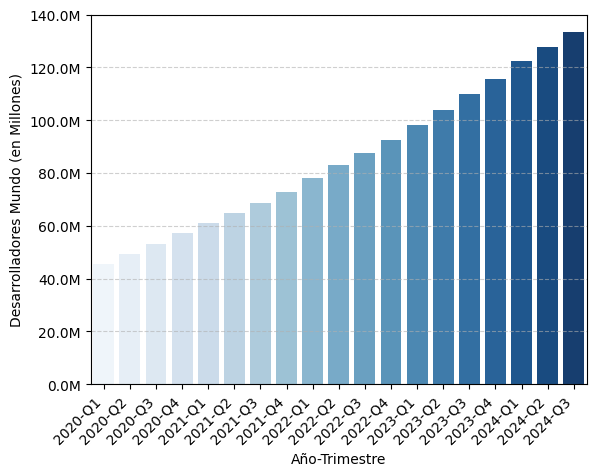

In [11]:
sns.barplot(data= developers_M, x = "year_quarter", y = "developers", palette="Blues")
plt.xticks(developers_M["year_quarter"].unique(),rotation=45, ha="right");
# Formatter function to display y-axis labels in millions
def millions(x, pos):
    return f'{x * 1e-6:.1f}M'  # Multiply by 1e-6 to convert to millions

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))
# Añadir solo líneas horizontales
plt.grid(True, axis='y', linestyle='--', alpha=0.6)  # Solo líneas horizontales
# Set the y-axis label
plt.ylabel('Desarrolladores Mundo (en Millones)')
plt.xlabel('Año-Trimestre')

In [12]:

# Group by the year and sum developers (or aggregate as needed)
developers_per_year_M = developers_M.groupby('year')['developers'].sum().reset_index()

# Calculate the Year-over-Year percentage change
developers_per_year_M['YoY_change'] = developers_per_year_M['developers'].pct_change() * 100

In [13]:
developers_per_year_M

,year,developers,YoY_change
0,2020,205333937,NaN
1,2021,267587577,30.318242
2,2022,341222672,27.518129
3,2023,427540581,25.296651
4,2024,383309687,-10.345426


In [14]:
developers_per_year_M.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        5 non-null      int64  
 1   developers  5 non-null      int64  
 2   YoY_change  4 non-null      float64
dtypes: float64(1), int64(2)
memory usage: 252.0 bytes


In [15]:
media_aprox_M = (developers_per_year_M.iloc[1]['YoY_change']+developers_per_year_M.iloc[2]['YoY_change']+developers_per_year_M.iloc[3]['YoY_change'])/3

In [16]:
media_aprox_M

np.float64(27.71100744344143)